# Example 2.5. 

### Training of the valuation of call options given prices of other call options

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import IPython

Execute the next line only if you want to use a GPU for the training

In [2]:
# IF GPU:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Read the data

In [3]:
# # Read Data
def read_data(xpath,ypath):
    df_x = pd.read_csv(xpath, header=None)
    df_x = df_x.dropna()

    df_y = pd.read_csv(ypath, header=None)
    df_y = df_y.dropna()
    
    
    # Deleting Errrative Scenarios
    df_x = df_x.drop(df_x[df_y.iloc[:,0] < 0].index)
    df_y = df_y.drop(df_y[df_y.iloc[:,0] < 0].index)
    
    return df_x,df_y

and build the model

In [4]:
def build_model(x,nr_neurons = 256,reg_param=0.00):

    model = keras.Sequential([
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param),activation='relu',input_shape=[62]),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(nr_neurons,kernel_regularizer=regularizers.l2(reg_param), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(2)
      ])
    model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae', 'mse'])
    scaler = StandardScaler().fit(x)
    return model, scaler

We prepare the data

In [5]:
# Train the model
EPOCHS = 1000
regul = 0
neurons = 512

#### TESTING

X_train,y_train = read_data('csv/x_train_calls.csv','csv/y_train_calls.csv')

X_test,y_test = read_data('csv/x_test_calls.csv','csv/y_test_calls.csv')

# Only consider 100 000 for training, 10 000 for testing
X_train, y_train = shuffle(X_train,y_train)
X_test, y_test = shuffle(X_test,y_test)

X_train = X_train.iloc[:100000,:]
y_train = y_train.iloc[:100000,:]
X_test = X_test.iloc[:10000,:]
y_test = y_test.iloc[:10000,:]

X_train, y_train = shuffle(X_train,y_train)
model, scaler = build_model(X_train,neurons,regul)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [6]:
#model=keras.models.load_model('model_call_options.h5')

Training of the model

In [7]:
# # Fit the Data
history = model.fit(X_train_scaled, y_train,  epochs=EPOCHS, batch_size = 256,
                    validation_split = 0.1, verbose=1,callbacks = [early_stop])

Train on 90000 samples, validate on 10000 samples
Epoch 1/1000
90000/90000 [==============================] - 3s 31us/sample - loss: 861.5429 - mae: 23.0439 - mse: 861.5424 - val_loss: 418.0015 - val_mae: 13.1986 - val_mse: 418.0015
Epoch 2/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 59.0550 - mae: 4.8396 - mse: 59.0550 - val_loss: 52.5210 - val_mae: 5.7580 - val_mse: 52.5210
Epoch 3/1000
90000/90000 [==============================] - 1s 17us/sample - loss: 45.6685 - mae: 4.2060 - mse: 45.6685 - val_loss: 39.4253 - val_mae: 4.4756 - val_mse: 39.4253
Epoch 4/1000
90000/90000 [==============================] - 2s 19us/sample - loss: 39.6394 - mae: 4.0590 - mse: 39.6394 - val_loss: 62.5624 - val_mae: 4.9639 - val_mse: 62.5624
Epoch 5/1000
90000/90000 [==============================] - 1s 17us/sample - loss: 41.3732 - mae: 4.0975 - mse: 41.3733 - val_loss: 8.2794 - val_mae: 1.9103 - val_mse: 8.2794
Epoch 6/1000
90000/90000 [==============================] - 2

90000/90000 [==============================] - 2s 19us/sample - loss: 16.5894 - mae: 3.2032 - mse: 16.5894 - val_loss: 2.8028 - val_mae: 0.9883 - val_mse: 2.8028
Epoch 48/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 14.8616 - mae: 3.0212 - mse: 14.8616 - val_loss: 2.7637 - val_mae: 1.0133 - val_mse: 2.7637
Epoch 49/1000
90000/90000 [==============================] - 2s 17us/sample - loss: 15.8552 - mae: 3.0853 - mse: 15.8552 - val_loss: 1.7971 - val_mae: 0.9050 - val_mse: 1.7971
Epoch 50/1000
90000/90000 [==============================] - 2s 17us/sample - loss: 17.2100 - mae: 3.2660 - mse: 17.2100 - val_loss: 6.5444 - val_mae: 1.5673 - val_mse: 6.5444
Epoch 51/1000
90000/90000 [==============================] - 2s 17us/sample - loss: 16.4565 - mae: 3.2111 - mse: 16.4565 - val_loss: 2.9644 - val_mae: 1.2841 - val_mse: 2.9644
Epoch 52/1000
90000/90000 [==============================] - 1s 15us/sample - loss: 17.1112 - mae: 3.1995 - mse: 17.1112 - val_loss: 5

90000/90000 [==============================] - 2s 17us/sample - loss: 15.3536 - mae: 3.0574 - mse: 15.3536 - val_loss: 1.6177 - val_mae: 1.0051 - val_mse: 1.6177
Epoch 94/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 14.7976 - mae: 3.0718 - mse: 14.7976 - val_loss: 5.5008 - val_mae: 1.9978 - val_mse: 5.5008
Epoch 95/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 13.2296 - mae: 2.8907 - mse: 13.2296 - val_loss: 2.6091 - val_mae: 1.0132 - val_mse: 2.6091
Epoch 96/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 13.8706 - mae: 2.9185 - mse: 13.8706 - val_loss: 1.3508 - val_mae: 1.0258 - val_mse: 1.3508
Epoch 97/1000
90000/90000 [==============================] - 1s 15us/sample - loss: 13.6323 - mae: 2.9077 - mse: 13.6323 - val_loss: 1.1269 - val_mae: 0.9188 - val_mse: 1.1269
Epoch 98/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 16.0865 - mae: 3.1619 - mse: 16.0865 - val_loss: 3

90000/90000 [==============================] - 2s 17us/sample - loss: 12.6652 - mae: 2.7790 - mse: 12.6652 - val_loss: 4.7231 - val_mae: 1.7782 - val_mse: 4.7231
Epoch 140/1000
90000/90000 [==============================] - 2s 20us/sample - loss: 13.9079 - mae: 2.9588 - mse: 13.9078 - val_loss: 0.9695 - val_mae: 0.7033 - val_mse: 0.9695
Epoch 141/1000
90000/90000 [==============================] - 2s 19us/sample - loss: 13.9355 - mae: 2.9119 - mse: 13.9355 - val_loss: 3.0085 - val_mae: 0.8957 - val_mse: 3.0085
Epoch 142/1000
90000/90000 [==============================] - 2s 19us/sample - loss: 12.7954 - mae: 2.7782 - mse: 12.7954 - val_loss: 0.7158 - val_mae: 0.5943 - val_mse: 0.7158
Epoch 143/1000
90000/90000 [==============================] - 2s 19us/sample - loss: 13.8660 - mae: 2.9626 - mse: 13.8660 - val_loss: 1.2028 - val_mae: 0.9273 - val_mse: 1.2028
Epoch 144/1000
90000/90000 [==============================] - 2s 19us/sample - loss: 14.2080 - mae: 2.9959 - mse: 14.2080 - val_lo

90000/90000 [==============================] - 2s 26us/sample - loss: 13.8690 - mae: 2.9495 - mse: 13.8690 - val_loss: 0.7659 - val_mae: 0.6813 - val_mse: 0.7659
Epoch 186/1000
90000/90000 [==============================] - 2s 20us/sample - loss: 13.9303 - mae: 3.0038 - mse: 13.9303 - val_loss: 1.0791 - val_mae: 0.7992 - val_mse: 1.0791
Epoch 187/1000
90000/90000 [==============================] - 2s 20us/sample - loss: 13.8854 - mae: 2.9998 - mse: 13.8854 - val_loss: 0.7816 - val_mae: 0.6506 - val_mse: 0.7816
Epoch 188/1000
90000/90000 [==============================] - 2s 27us/sample - loss: 12.4592 - mae: 2.7977 - mse: 12.4592 - val_loss: 2.8107 - val_mae: 1.0623 - val_mse: 2.8107
Epoch 189/1000
90000/90000 [==============================] - 2s 23us/sample - loss: 12.4642 - mae: 2.8397 - mse: 12.4642 - val_loss: 2.2384 - val_mae: 0.9432 - val_mse: 2.2384
Epoch 190/1000
90000/90000 [==============================] - 2s 23us/sample - loss: 14.9133 - mae: 3.0882 - mse: 14.9133 - val_lo

90000/90000 [==============================] - 1s 16us/sample - loss: 14.7176 - mae: 3.0346 - mse: 14.7176 - val_loss: 2.2731 - val_mae: 1.4176 - val_mse: 2.2731
Epoch 232/1000
90000/90000 [==============================] - 2s 18us/sample - loss: 13.5926 - mae: 2.9045 - mse: 13.5926 - val_loss: 1.1512 - val_mae: 0.9466 - val_mse: 1.1512
Epoch 233/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 13.3948 - mae: 2.9004 - mse: 13.3948 - val_loss: 2.7086 - val_mae: 1.3609 - val_mse: 2.7086
Epoch 234/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 15.4832 - mae: 3.1975 - mse: 15.4832 - val_loss: 2.6211 - val_mae: 1.2253 - val_mse: 2.6211
Epoch 235/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 14.6312 - mae: 3.0341 - mse: 14.6312 - val_loss: 1.8625 - val_mae: 0.9022 - val_mse: 1.8625
Epoch 236/1000
90000/90000 [==============================] - 1s 16us/sample - loss: 14.1314 - mae: 2.9554 - mse: 14.1314 - val_lo

We plot the training on training set and validation set.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


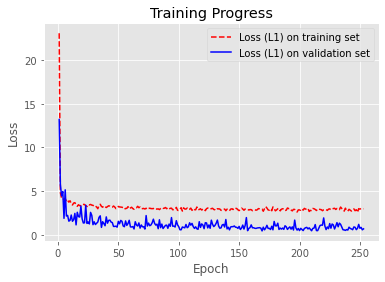

In [8]:
# Plot the training process
training_loss = history.history["mae"]
val_loss = history.history["val_mae"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, val_loss, "b-")
plt.legend(["Loss (L1) on training set", "Loss (L1) on validation set"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Progress")
plt.savefig('history_spot_call_options.eps', format='eps')
plt.show()

In [9]:
# Make a single Prediction
indices = [max(round(float(np.random.sample(1)*(len(X_test)-1))),0) for i in range(5)]
print("Prediction")
print(np.round(model.predict(X_test_scaled[indices]),5))
print("True Values")
print(y_test.iloc[indices,:])

Prediction
[[  0.73889   2.28905]
 [  1.07887   1.97337]
 [  1.0063    1.05841]
 [135.69644 139.37352]
 [  1.31396  19.92794]]
True Values
              0           1
6230    -0.0000    1.883752
8944    -0.0000    0.645994
4010    -0.0000    0.568669
5404   139.9703  140.708124
10223   -0.0000   14.510580


We evaluate the neural network

Model Evaluation
10000/10000 - 0s - loss: 25.7028 - mae: 2.2033 - mse: 25.7028
[25.70278347892761, 2.2033422, 25.702791]


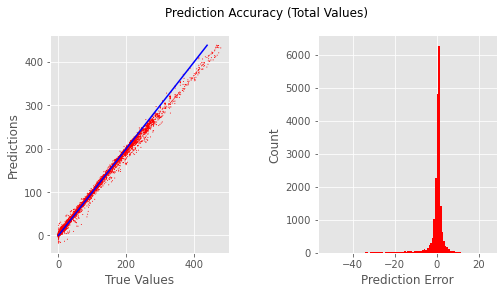

In [10]:
# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.5)
#Along a line
test_predictions = model.predict(X_test_scaled).flatten()
#a = plt.axes(aspect='equal')
axs[0].plot([0,max(test_predictions)],[0,max(test_predictions)],color = "blue")


axs[0].scatter(y_test, test_predictions, c=['red']*len(y_test)*2,s=1, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions')

# Histogram
error = np.array(model.predict(X_test_scaled) - y_test).flatten()
axs[1].hist(error, bins = 100,color='red')
axs[1].set_xlabel("Prediction Error")
axs[1].set_ylabel("Count")
fig.suptitle('Prediction Accuracy (Total Values)')
plt.savefig('accuracy_spot_call_options.eps', format='eps')



# Model Evaluation
print("Model Evaluation")
print(model.evaluate(X_test_scaled, y_test, verbose=2))

We also consider relative errors (Division by spot values)

Model Evaluation 
 
Relative Mean absolute Error:
0.011130177850595037


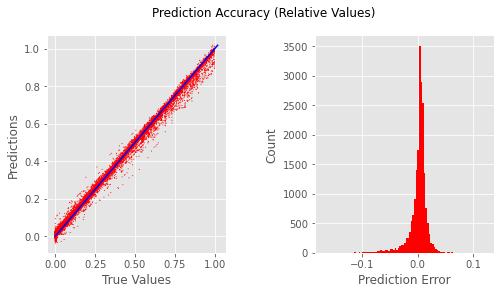

In [11]:
# Plot the errors
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.5)



#Along a line
test_predictions_relative =  model.predict(X_test_scaled).flatten('F')/np.concatenate((np.array(X_test.iloc[:,0]),np.array(X_test.iloc[:,0])))
y_test_relative =  np.array(y_test).flatten('F')/np.concatenate((np.array(X_test.iloc[:,0]),np.array(X_test.iloc[:,0])))

#a = plt.axes(aspect='equal')
axs[0].plot([0,max(test_predictions_relative)],[0,max(test_predictions_relative)],color = "blue")
axs[0].scatter(y_test_relative, test_predictions_relative,c=['red']*len(y_test)*2,s=1, edgecolors='None')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predictions')


# Histogram
error = np.array(test_predictions_relative - y_test_relative)
axs[1].hist(error, bins = 100,color='red')
axs[1].set_xlabel("Prediction Error")
axs[1].set_ylabel("Count")
fig.suptitle('Prediction Accuracy (Relative Values)')
plt.savefig('accuracy_relative_spot_call_options.eps', format='eps')

# Evaluate the model
print("Model Evaluation \n \nRelative Mean absolute Error:")
print(np.mean(np.abs(test_predictions_relative - y_test_relative)))

In [12]:
# Save the model
model.save("model_call_options.h5")

# Percentage Error